# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [67]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [68]:
athletes = pd.read_csv("athletes.csv")

In [69]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [70]:
# Sua análise começa aqui.
athletes.shape

(11538, 11)

In [71]:
athletes.head(2)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0


In [72]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 766.3+ KB


In [73]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [74]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [75]:
# Selecionando a amostra de 3000 observações da coluna height

height_3000 = get_sample(athletes, 'height', n=3000, seed=42)

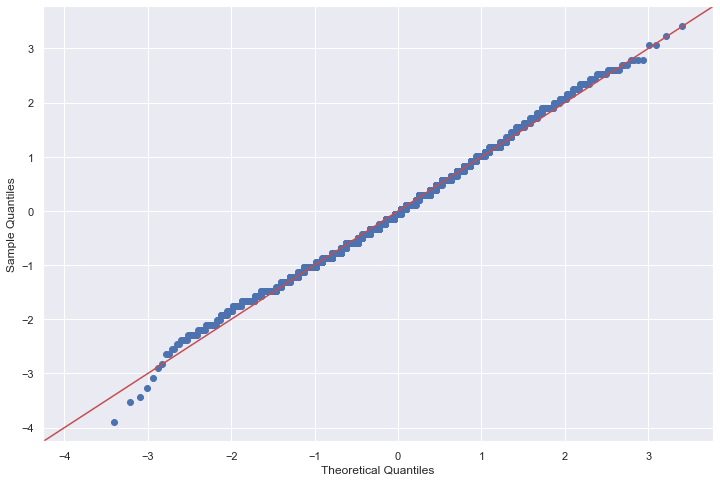

In [76]:
sm.qqplot(height_3000, fit=True, line="45");

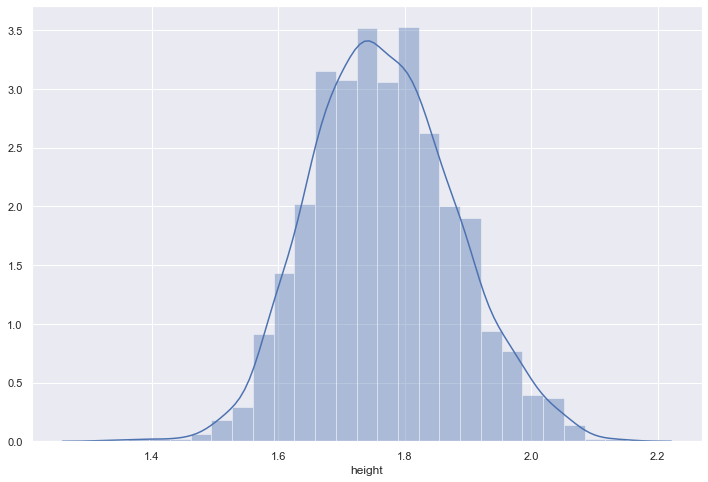

In [77]:
sns.distplot(height_3000, bins=25);

In [78]:
sct.shapiro(height_3000)

(0.996148943901062, 5.622866297017026e-07)

In [79]:
shapiro_stat, shapiro_pvalue = sct.shapiro(height_3000)

In [80]:
if shapiro_pvalue > 0.05:
    print('Com 95% de confiança, os dados são similares a uma distribição normal')
else:
    print('Com 95% de confiança, os dados NÃO são similares a uma distribição normal')

Com 95% de confiança, os dados NÃO são similares a uma distribição normal


In [81]:
sct.jarque_bera(height_3000)

(13.03363513594265, 0.001478366424594868)

In [82]:
jarque_stat, jarque_pvalue = sct.jarque_bera(height_3000)

In [83]:
if jarque_pvalue > 0.05:
    print('Com 95% de confiança, os dados são similares a uma distribição normal')
else:
    print('Com 95% de confiança, os dados NÃO são similares a uma distribição normal')

Com 95% de confiança, os dados NÃO são similares a uma distribição normal


In [84]:
# Selecionando a amostra de 3000 observações da coluna weight

weight_3000 = get_sample(athletes, 'weight', n=3000, seed=42)

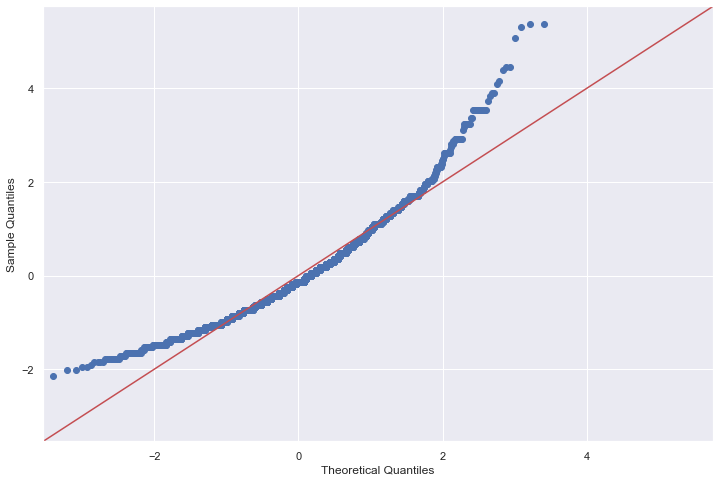

In [85]:
sm.qqplot(weight_3000, fit=True, line="45");

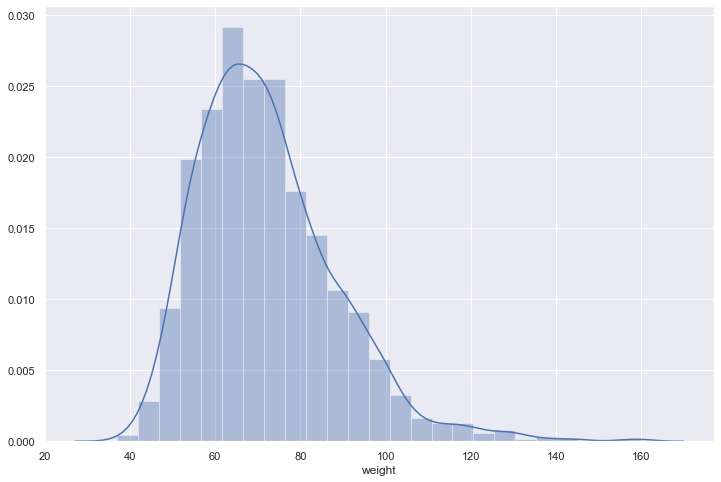

In [86]:
sns.distplot(weight_3000, bins=25);

In [87]:
sct.normaltest(weight_3000)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [88]:
normal_stat, normal_pvalue = sct.normaltest(weight_3000)

In [89]:
if normal_pvalue > 0.05:
    print('Com 95% de confiança, os dados são similares a uma distribição normal')
else:
    print('Com 95% de confiança, os dados NÃO são similares a uma distribição normal')

Com 95% de confiança, os dados NÃO são similares a uma distribição normal


In [90]:
# transformação logarítmica da amostra de 3000 observações da coluna weight

weight_3000_log = np.log(weight_3000)

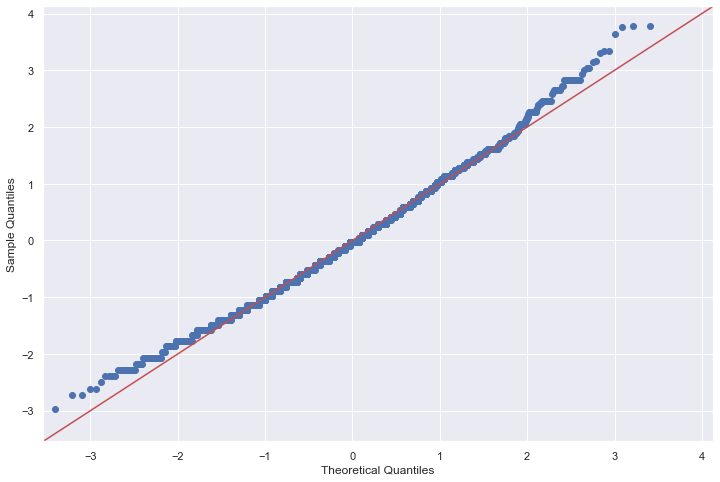

In [91]:
sm.qqplot(weight_3000_log, fit=True, line="45");

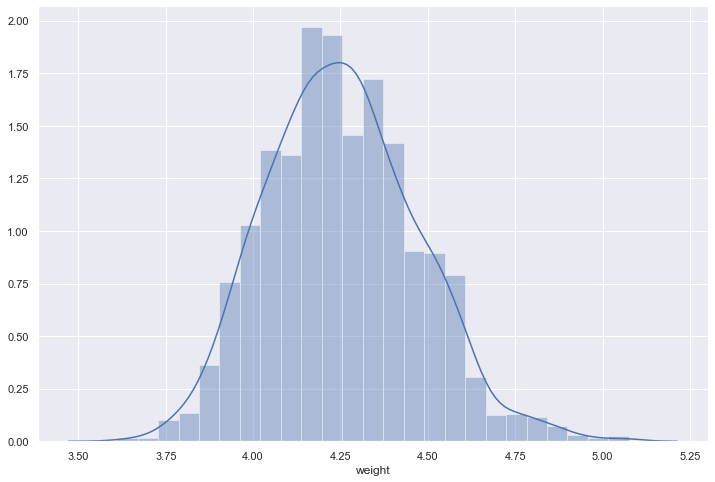

In [92]:
sns.distplot(weight_3000_log, bins=25);

In [93]:
sct.normaltest(weight_3000_log)

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [94]:
normal_stat_log, normal_pvalue_log = sct.normaltest(weight_3000_log)

In [95]:
if normal_pvalue_log > 0.05:
    print('Com 95% de confiança, os dados são similares a uma distribição normal')
else:
    print('Com 95% de confiança, os dados NÃO são similares a uma distribição normal')

Com 95% de confiança, os dados NÃO são similares a uma distribição normal


In [96]:
# Filtrando todos atletas brasileiros, norte-americanos e canadenses as observações da coluna height

height_bra = athletes.query('nationality in "BRA"')['height'].dropna()
height_can = athletes.query('nationality in "CAN"')['height'].dropna()
height_usa = athletes.query('nationality in "USA"')['height'].dropna()

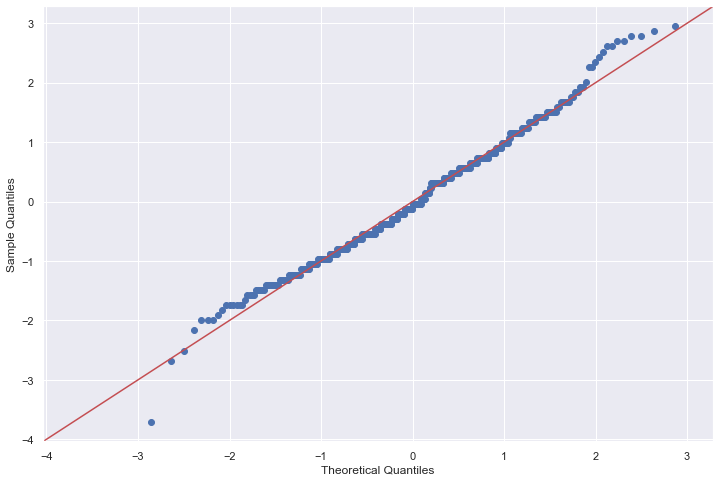

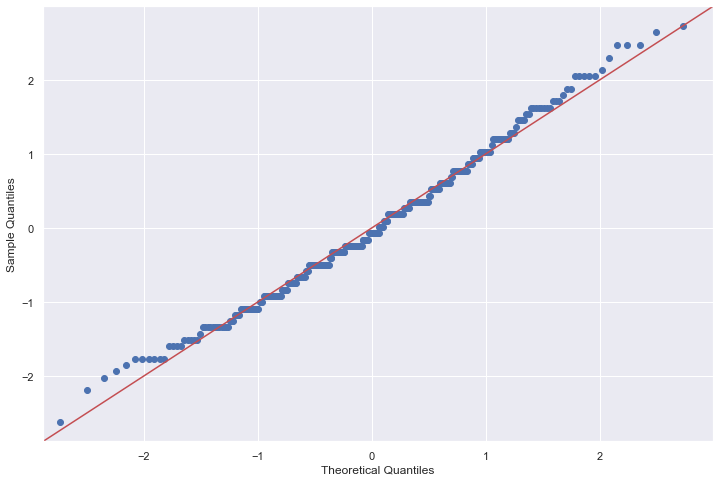

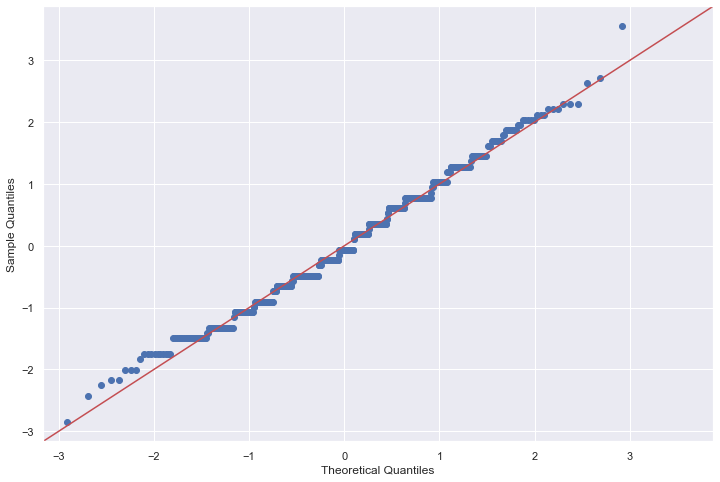

In [97]:
bra = sm.qqplot(height_bra, fit=True, line="45")
can = sm.qqplot(height_can, fit=True, line="45")
usa = sm.qqplot(height_usa, fit=True, line="45")

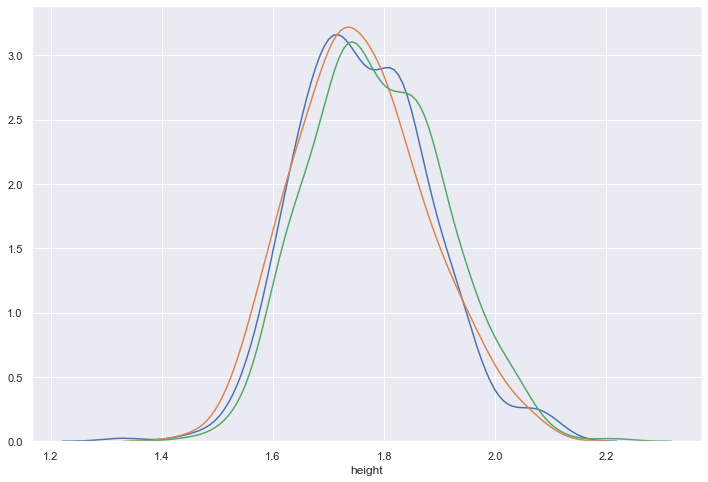

In [98]:
sns.distplot(height_bra, bins=25, hist=False)
sns.distplot(height_can, bins=25, hist=False)
sns.distplot(height_usa, bins=25, hist=False)
plt.show()

In [99]:
print('A média de altura do Brasil:', height_bra.mean().round(3))
print('A média de altura do EUA:', height_usa.mean().round(3))
print('A média de altura do Canada:', height_can.mean().round(3))

A média de altura do Brasil: 1.764
A média de altura do EUA: 1.788
A média de altura do Canada: 1.759


In [100]:
sct.ttest_ind(height_bra, height_usa, equal_var=False)

Ttest_indResult(statistic=-3.2232436467501553, pvalue=0.001308004183014406)

In [101]:
ttest_stat1, ttest_pvalue1 = sct.ttest_ind(height_bra, height_usa, equal_var=False)

In [102]:
if ttest_pvalue1 > 0.05:
    print('Com 95% de confiança, as médias das alturas de Brasil e EUA são estatisticamente iguais')
else:
    print('Com 95% de confiança, as médias das alturas de Brasil e EUA NÃO são estatisticamente iguais')

Com 95% de confiança, as médias das alturas de Brasil e EUA NÃO são estatisticamente iguais


In [103]:
sct.ttest_ind(height_bra, height_can, equal_var=False)

Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)

In [104]:
ttest_stat2, ttest_pvalue2 = sct.ttest_ind(height_bra, height_can, equal_var=False)

In [105]:
if ttest_pvalue2 > 0.05:
    print('Com 95% de confiança, as médias das alturas de Brasil e Canada são estatisticamente iguais')
else:
    print('Com 95% de confiança, as médias das alturas de Brasil e Canada NÃO são estatisticamente iguais')

Com 95% de confiança, as médias das alturas de Brasil e Canada são estatisticamente iguais


In [106]:
sct.ttest_ind(height_usa, height_can, equal_var=False)

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347388888)

In [107]:
ttest_stat3, ttest_pvalue3 = sct.ttest_ind(height_usa, height_can)

In [108]:
if ttest_pvalue3 > 0.05:
    print('Com 95% de confiança, as médias das alturas de EUA e Canada são estatisticamente iguais')
else:
    print('Com 95% de confiança, as médias das alturas de EUA e Canada NÃO são estatisticamente iguais')

Com 95% de confiança, as médias das alturas de EUA e Canada NÃO são estatisticamente iguais


In [109]:
float(ttest_pvalue3.round(8))

0.00047179

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [110]:
def q1():
    height_3000 = get_sample(athletes, 'height', n=3000, seed=42)
    shapiro_stat, shapiro_pvalue = sct.shapiro(height_3000)
    return bool(shapiro_pvalue > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [111]:
def q2():
    height_3000 = get_sample(athletes, 'height', n=3000, seed=42)
    jarque_stat, jarque_pvalue = sct.jarque_bera(height_3000)
    return bool(jarque_pvalue > 0.05)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [112]:
def q3():
    weight_3000 = get_sample(athletes, 'weight', n=3000, seed=42)
    normal_stat, normal_pvalue = sct.normaltest(weight_3000)
    return bool(normal_pvalue > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [113]:
def q4():
    weight_3000 = get_sample(athletes, 'weight', n=3000, seed=42)
    weight_3000_log = np.log(weight_3000)
    normal_stat_log, normal_pvalue_log = sct.normaltest(weight_3000_log)
    return bool(normal_pvalue_log > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [114]:
def q5():
    height_bra = athletes.query('nationality in "BRA"')['height'].dropna()
    height_usa = athletes.query('nationality in "USA"')['height'].dropna()
    ttest_stat1, ttest_pvalue1 = sct.ttest_ind(height_bra, height_usa, equal_var=False)
    return bool(ttest_pvalue1 > 0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [115]:
def q6():
    height_bra = athletes.query('nationality in "BRA"')['height'].dropna()
    height_can = athletes.query('nationality in "CAN"')['height'].dropna()
    ttest_stat2, ttest_pvalue2 = sct.ttest_ind(height_bra, height_can, equal_var=False)
    return bool(ttest_pvalue2 > 0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [116]:
def q7():
    height_can = athletes.query('nationality in "CAN"')['height'].dropna()
    height_usa = athletes.query('nationality in "USA"')['height'].dropna()
    ttest_stat3, ttest_pvalue3 = sct.ttest_ind(height_usa, height_can, equal_var=False)
    return float(ttest_pvalue3.round(8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?